In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read Pre-Merged Data and Poverty Data

In [36]:
df_cenus_epa_climate = pd.read_csv('../data/cenus_epa_climate_merged.csv')
df_poverty = pd.read_csv('../data/census_data/poverty_all_tracts.csv')

In [37]:
df_cenus_epa_climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85395 entries, 0 to 85394
Columns: 114 entries, ID to pop_density
dtypes: float64(109), int64(1), object(4)
memory usage: 74.3+ MB


In [38]:
df_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85395 entries, 0 to 85394
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           85395 non-null  int64  
 1   poverty_pct  84324 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 1.3 MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85395 entries, 0 to 85394
Columns: 115 entries, ID to poverty_pct
dtypes: float64(110), int64(1), object(4)
memory usage: 74.9+ MB


<Axes: >

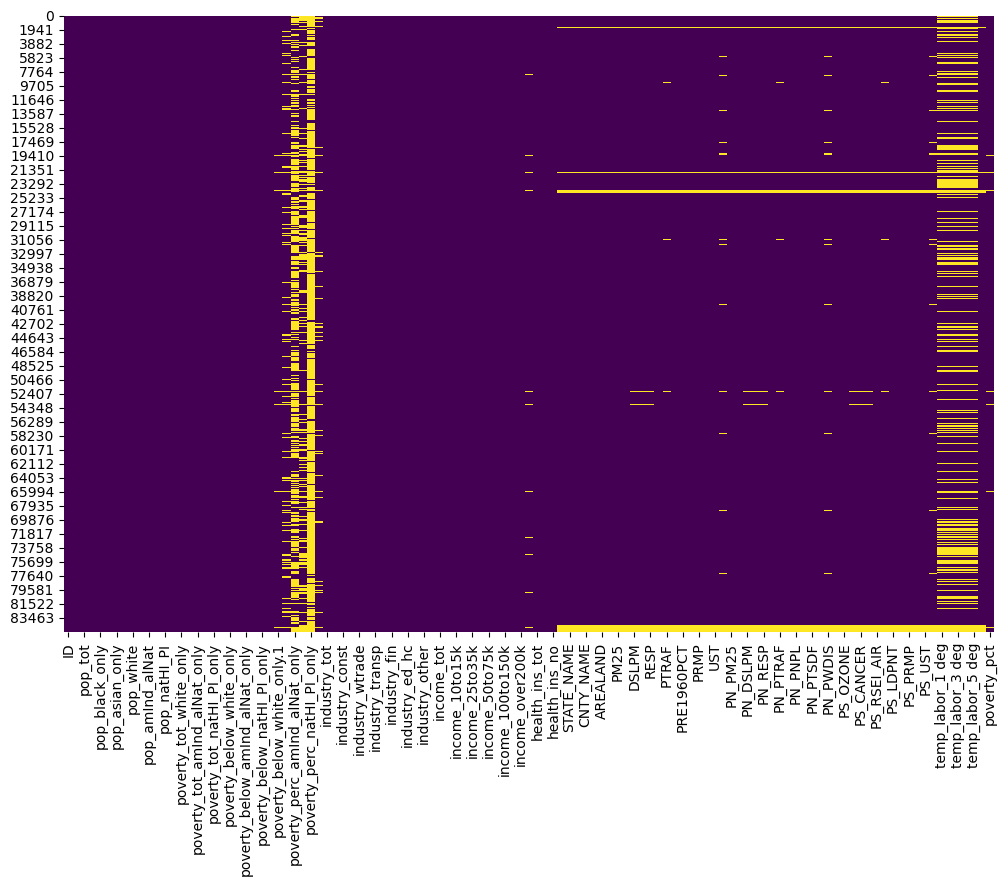

In [39]:
df_merged = pd.merge(df_cenus_epa_climate, df_poverty, how='left', on='ID')
df_merged.info()

plt.figure(figsize=(12,8))
sns.heatmap(df_merged.isnull(), cmap='viridis', cbar=False)

In [40]:
print('\nCOLUMN NAME : NULL COUNT')
for col in df_merged.columns: 
    print(col, ':', sum(df_merged[col].isnull()))


COLUMN NAME : NULL COUNT
ID : 0
NAME : 0
pop_tot : 0
pop_white_only : 0
pop_black_only : 0
pop_amInd_alNat_only : 0
pop_asian_only : 0
pop_natHI_PI_only : 0
pop_white : 0
pop_black : 0
pop_amInd_alNat : 0
pop_asian : 0
pop_natHI_PI : 0
pop_hispanic_latino_any : 0
poverty_tot_white_only : 0
poverty_tot_black_only : 0
poverty_tot_amInd_alNat_only : 0
poverty_tot_asian_only : 0
poverty_tot_natHI_PI_only : 0
poverty_tot_hispanic_latino_any : 0
poverty_below_white_only : 0
poverty_below_black_only : 0
poverty_below_amInd_alNat_only : 0
poverty_below_asian_only : 0
poverty_below_natHI_PI_only : 0
poverty_below_hispanic_latino_any : 0
poverty_below_white_only.1 : 1238
poverty_perc_black_only : 11742
poverty_perc_amInd_alNat_only : 48442
poverty_perc_asian_only : 21549
poverty_perc_natHI_PI_only : 75274
poverty_perc_hispanic_latino_any : 4778
industry_tot : 0
industry_ag_for : 0
industry_const : 0
industry_manu : 0
industry_wtrade : 0
industry_rtrade : 0
industry_transp : 0
industry_info : 0


In [ ]:
# Choose columns to keep

In [41]:
select_columns = [
'ID',
'NAME',
# geo info
'STATE_NAME',
'ST_ABBREV',
'CNTY_NAME',
'REGION',
'AREALAND',
# race
'pop_tot',
'pop_white_only',
'pop_black',
'pop_asian',
'pop_hispanic_latino_any',
# industry
'industry_tot',
'industry_ag_for',
'industry_const',
'industry_manu',
'industry_transp',
# economic
'pop_density',
'poverty_pct',
'income_median',
'health_ins_tot',
'health_ins_yes',
'health_ins_no',
# EPA
'PM25',
'OZONE',
'DSLPM',
# 'CANCER',
# 'RESP',
# 'RSEI_AIR',
'PTRAF',
# 'PRE1960',
'PRE1960PCT',
'PNPL',
'PRMP',
'PTSDF',
'UST',
'PWDIS',
]

<Axes: >

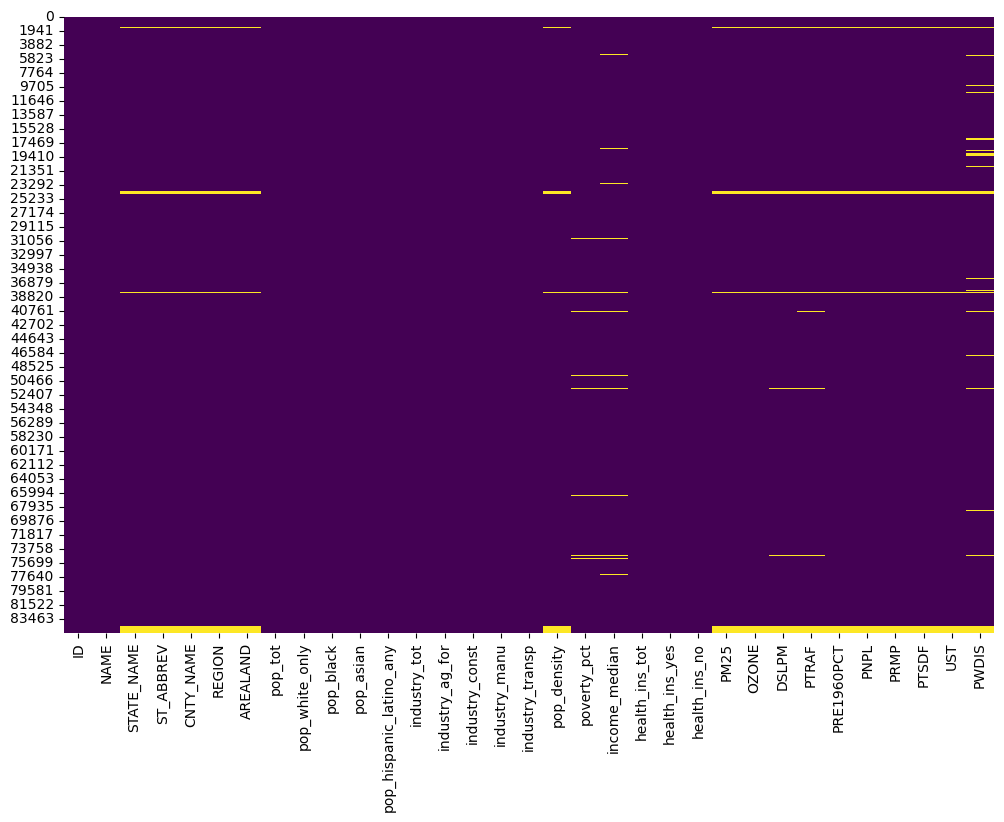

In [43]:
df_merged_clean = df_merged[select_columns]

plt.figure(figsize=(12,8))
sns.heatmap(df_merged_clean.isnull(), cmap='viridis', cbar=False)

In [ ]:
# Cut rows that are completely missing from EPA: 
# Should be Alaska, Puerto Rico, etc...

Number of Tracts Removed From EPA Before Merging:  1913

COLUMN NAME : NULL COUNT
ID : 0
NAME : 0
STATE_NAME : 0
ST_ABBREV : 0
CNTY_NAME : 0
REGION : 0
AREALAND : 0
pop_tot : 0
pop_white_only : 0
pop_black : 0
pop_asian : 0
pop_hispanic_latino_any : 0
industry_tot : 0
industry_ag_for : 0
industry_const : 0
industry_manu : 0
industry_transp : 0
pop_density : 0
poverty_pct : 677
income_median : 1220
health_ins_tot : 0
health_ins_yes : 0
health_ins_no : 0
PM25 : 6
OZONE : 6
DSLPM : 215
PTRAF : 416
PRE1960PCT : 0
PNPL : 0
PRMP : 0
PTSDF : 0
UST : 0
PWDIS : 2279


<Axes: >

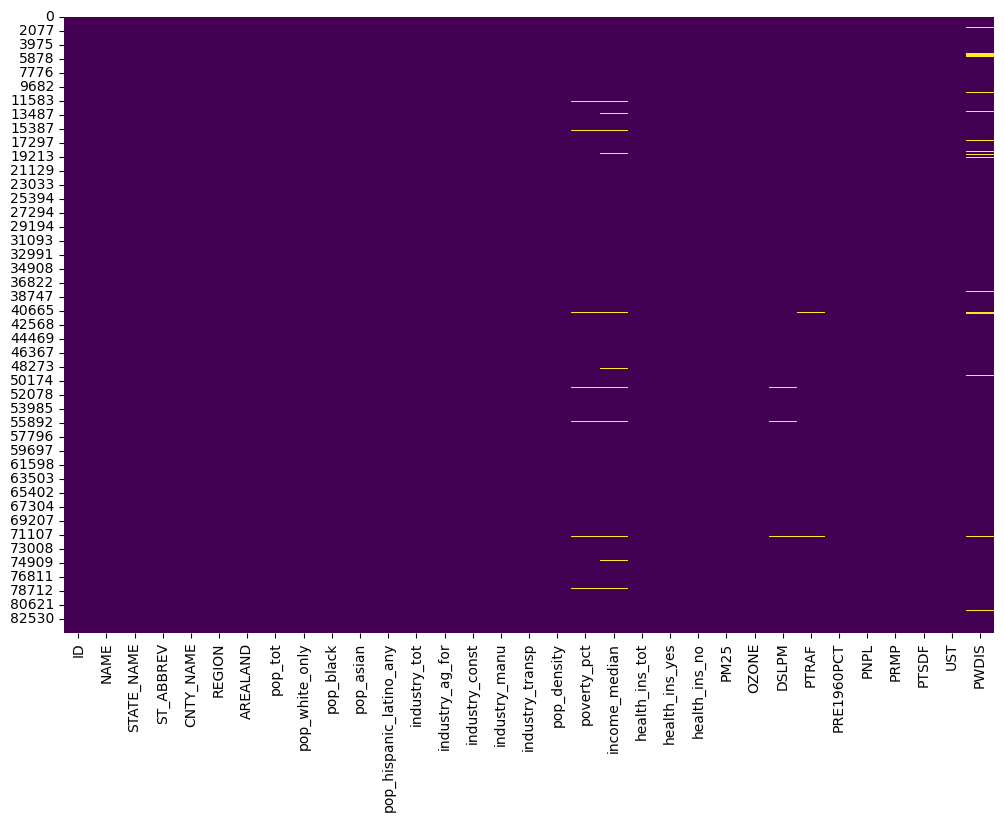

In [44]:
missing_epa = df_merged_clean[df_merged_clean['STATE_NAME'].isnull()]
print("Number of Tracts Removed From EPA Before Merging: ", len(missing_epa.index))

df_merged_clean = df_merged_clean.drop(missing_epa.index)

print('\nCOLUMN NAME : NULL COUNT')
for col in df_merged_clean.columns: 
    print(col, ':', sum(df_merged_clean[col].isnull()))

plt.figure(figsize=(12,8))
sns.heatmap(df_merged_clean.isnull(), cmap='viridis', cbar=False)

In [ ]:
# Cut rows with ANY null value: 

Number of Tracts to Cut:  3331
Number of Rural Tracts to Cut:  2062
Number of Urban Tracts to Cut:  1269
% rows cut at national level:  3.990081694257445

<class 'pandas.core.frame.DataFrame'>
Index: 80151 entries, 0 to 84413
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       80151 non-null  int64  
 1   NAME                     80151 non-null  object 
 2   STATE_NAME               80151 non-null  object 
 3   ST_ABBREV                80151 non-null  object 
 4   CNTY_NAME                80151 non-null  object 
 5   REGION                   80151 non-null  float64
 6   AREALAND                 80151 non-null  float64
 7   pop_tot                  80151 non-null  float64
 8   pop_white_only           80151 non-null  float64
 9   pop_black                80151 non-null  float64
 10  pop_asian                80151 non-null  float64
 11  pop_hispanic_latino_any  80151 non

<Axes: >

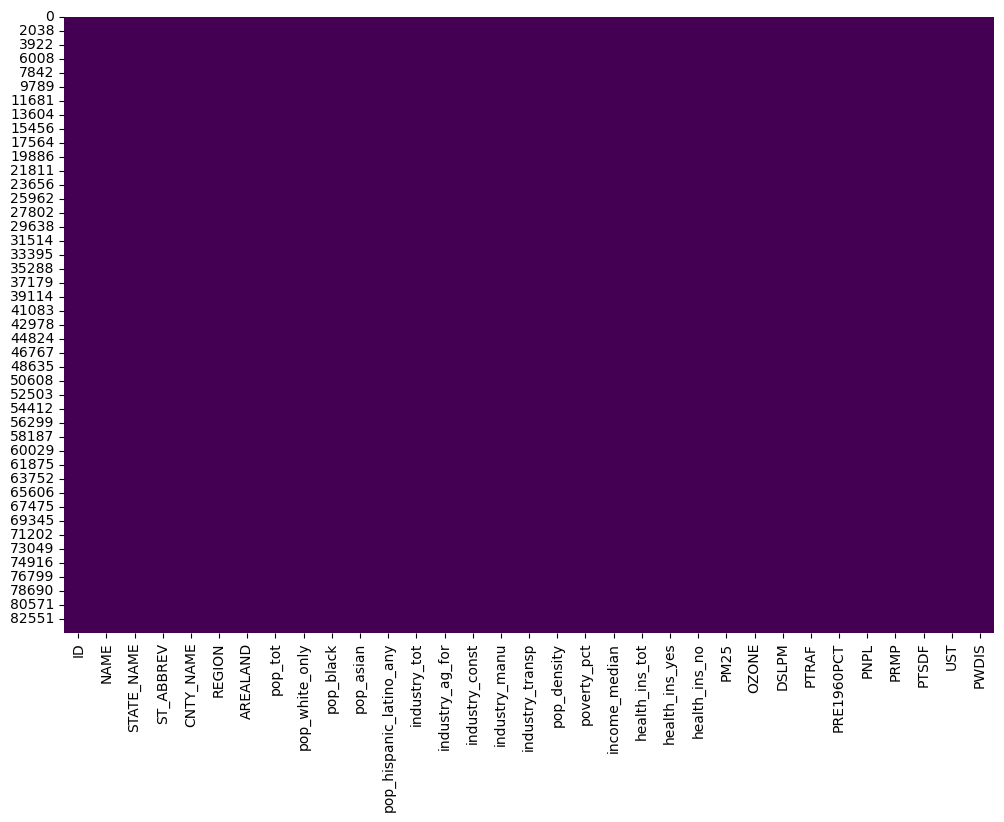

In [45]:
cut_rows = df_merged_clean[df_merged_clean.isnull().any(axis=1)]
print("Number of Tracts to Cut: ", len(cut_rows.index))

cut_rows_rural = cut_rows[cut_rows['pop_density']<500]
print("Number of Rural Tracts to Cut: ", len(cut_rows_rural.index))

cut_rows_urban = cut_rows[cut_rows['pop_density']>=500]
print("Number of Urban Tracts to Cut: ", len(cut_rows_urban.index))

print("% rows cut at national level: ", len(cut_rows.index)/len(df_merged_clean)*100)
print('')

df_merged_clean = df_merged_clean.drop(cut_rows.index)
df_merged_clean.info()

plt.figure(figsize=(12,8))
sns.heatmap(df_merged_clean.isnull(), cmap='viridis', cbar=False)

In [46]:
# Calculate the Theil Index contributions
def calc_theil(df, char_str):
    '''
    Calculates the generalized entropy index of given agents with an associated characteristic 
    
    Inputs: 
    df - data frame containing population and characteristic data, NEEDS TO BE FOR ENTIRE COUNTRY
    char_str - string, characteristic wanting to be measured (income, race, etc)
    '''
    
    i = df[char_str]
    N = len(i)
    
    xi = df[char_str]
    mu = xi.mean()
    
    # calculate the Theil L index contributions which are more sensitive to changes in the lower end of the distribution than Theil T
    TL_contr = (1/N)*np.log(mu/xi)
    
    # drop characteristics that are 0
    TL_contr[xi == 0] = np.nan
    
    name = 'theil_' + char_str
    
    if name in df:
        print('This column already exists. Recalculating.')
        df = df.drop(columns=[name])
        
    df[name] = TL_contr
    

In [ ]:
# Calculate the full Theil Index for each county

def calc_theil_county(df, char_str):
    '''
    Calculates the Theil L index for each county using tract-level data, then adds the county-level index for each tract in the county

    Inputs:
    df - data frame containing population, county name, and characteristic data, NEEDS TO BE FOR ENTIRE COUNTRY
    char_str - string, characteristic wanting to be measured (income, race, etc)
    '''


    # this will be a dict of Thiel L index for each county
    TL_by_county = {}

    # (1) calculates the Thiel L index contribution of each tract in a county
    # (2) sums the contributions to find the Thiel L index for that county
    for county, group in df.groupby('CNTY_NAME'):
        N = len(group) # number of tracts in county
        xi = group[char_str] # tract-level values of desired variable, separated into groups by county
        mu = xi.mean() # mean of variable over county

        TL_contr = (1/N) * np.log(mu / xi) # formula for Theil contribution of each tract
        group['TL_contr'] = TL_contr # assigning contribution to each row in a county group
        TL_by_county[county] = TL_contr.sum() # adds contributions for each tract in county, then stores the county index in the dict

    name = 'theil_county_' + char_str # this is the column name for the Theil L index for the variable you want

    if name in df: # don't want to add unnecessary cplumns, so checks if we have the column already
        print('This column already exists. Recalculating.')
        df = df.drop(columns=[name])
    
    df[name] = df['CNTY_NAME'].map(TL_by_county) # assigns the county-level Thiel L index to each tract in the county in the original dataframe







In [ ]:
# Calc Percentages and Theil Indices

In [47]:
df = df_merged_clean
df['pct_pop_white_only'] = df['pop_white_only']/ df['pop_tot']*100
df['pct_pop_black'] = df['pop_black']/ df['pop_tot']*100
df['pct_pop_asian'] = df['pop_asian']/ df['pop_tot']*100
df['pct_pop_hispanic_latino_any'] = df['pop_hispanic_latino_any']/ df['pop_tot']*100

## These produce too many null values:
# calc_theil(df, 'pop_white_only')
# calc_theil(df, 'pop_black')
# calc_theil(df, 'pop_asian')
# calc_theil(df, 'pop_hispanic_latino_any')

df['prim_ind_share'] = (df['industry_ag_for'])/ df['health_ins_tot']*100
df['sec_ind_share'] = (df['industry_const'] + df['industry_manu'])/ df['health_ins_tot']*100
df['health_ins_pct'] = df['health_ins_yes']/ df['health_ins_tot']*100

calc_theil(df, 'income_median')

df_final = df
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80151 entries, 0 to 84413
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           80151 non-null  int64  
 1   NAME                         80151 non-null  object 
 2   STATE_NAME                   80151 non-null  object 
 3   ST_ABBREV                    80151 non-null  object 
 4   CNTY_NAME                    80151 non-null  object 
 5   REGION                       80151 non-null  float64
 6   AREALAND                     80151 non-null  float64
 7   pop_tot                      80151 non-null  float64
 8   pop_white_only               80151 non-null  float64
 9   pop_black                    80151 non-null  float64
 10  pop_asian                    80151 non-null  float64
 11  pop_hispanic_latino_any      80151 non-null  float64
 12  industry_tot                 80151 non-null  float64
 13  industry_ag_for      

In [49]:
#df_final[df_final['pop_density']>500].info()

In [50]:
df_final.to_csv('../data/census_epa_theil_cleaned.csv', index=False)

In [51]:
test = pd.read_csv('../data/census_epa_theil_cleaned.csv')

In [52]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80151 entries, 0 to 80150
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           80151 non-null  int64  
 1   NAME                         80151 non-null  object 
 2   STATE_NAME                   80151 non-null  object 
 3   ST_ABBREV                    80151 non-null  object 
 4   CNTY_NAME                    80151 non-null  object 
 5   REGION                       80151 non-null  float64
 6   AREALAND                     80151 non-null  float64
 7   pop_tot                      80151 non-null  float64
 8   pop_white_only               80151 non-null  float64
 9   pop_black                    80151 non-null  float64
 10  pop_asian                    80151 non-null  float64
 11  pop_hispanic_latino_any      80151 non-null  float64
 12  industry_tot                 80151 non-null  float64
 13  industry_ag_for 